- Import Packages 

In [2]:
import pandas as pd 

- load the data 

In [4]:
data = pd.read_csv('./calories.csv')
data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
data_1 = pd.read_csv('./exercise.csv')
data_1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


- Making them into one particular dataset 

In [12]:
df = pd.merge(data_1 , data , on = 'User_ID')

In [13]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


- checking the Quality of the data 

In [14]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [15]:
df = df.drop(['User_ID'],axis = 1)


In [16]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [17]:
df['Gender'] = df['Gender'].map({'male':0,'female':1}).astype(int)

In [18]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
import matplotlib.pyplot as plt 

Age


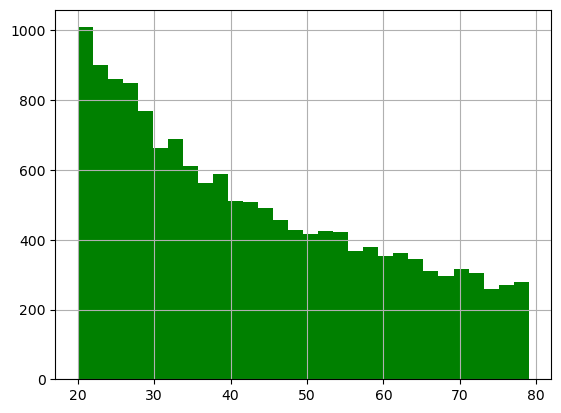

Height


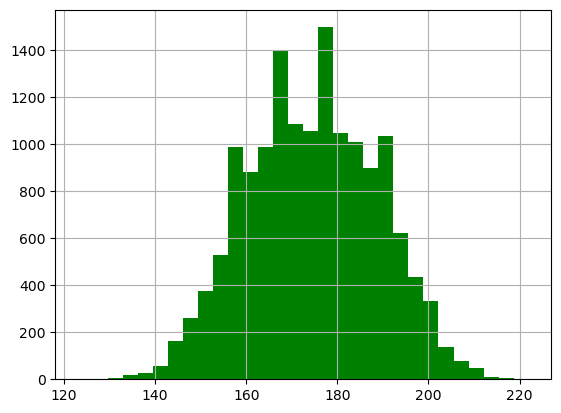

Weight


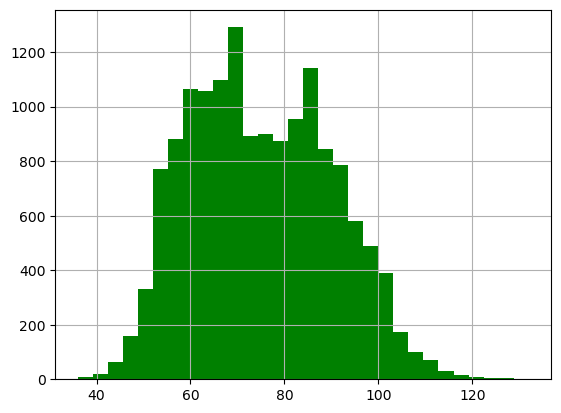

Duration


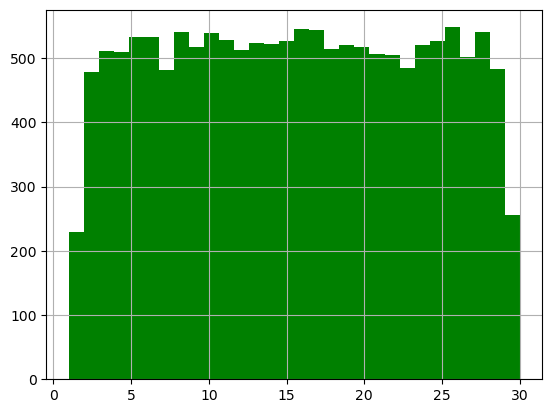

Heart_Rate


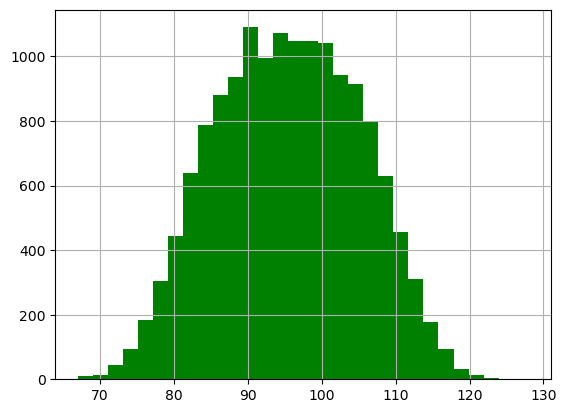

Body_Temp


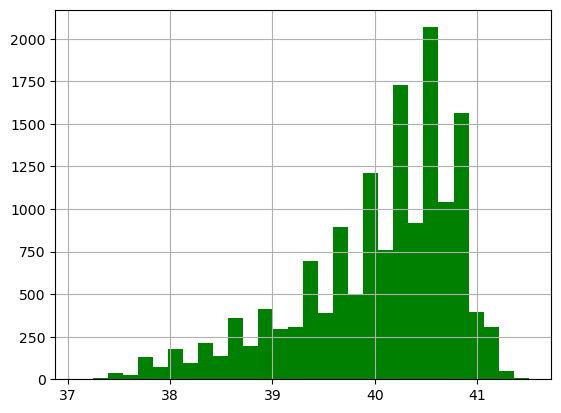

In [27]:
for i in df.columns:
    #print(i)
    if i == 'Gender' or i == 'Calories':
        pass
    else:
        print(i)
        df[i].hist(bins = 30 , color = 'g')
    plt.show()
    

- side by side distribution 

In [28]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [30]:
a = [1,2,3,4]
b = [5,6,7,8]

for i , j in zip(a[::-1],b):
    print(i,j)


4 5
3 6
2 7
1 8


In [34]:
import seaborn as sns 

In [36]:
import warnings
warnings.filterwarnings('ignore')

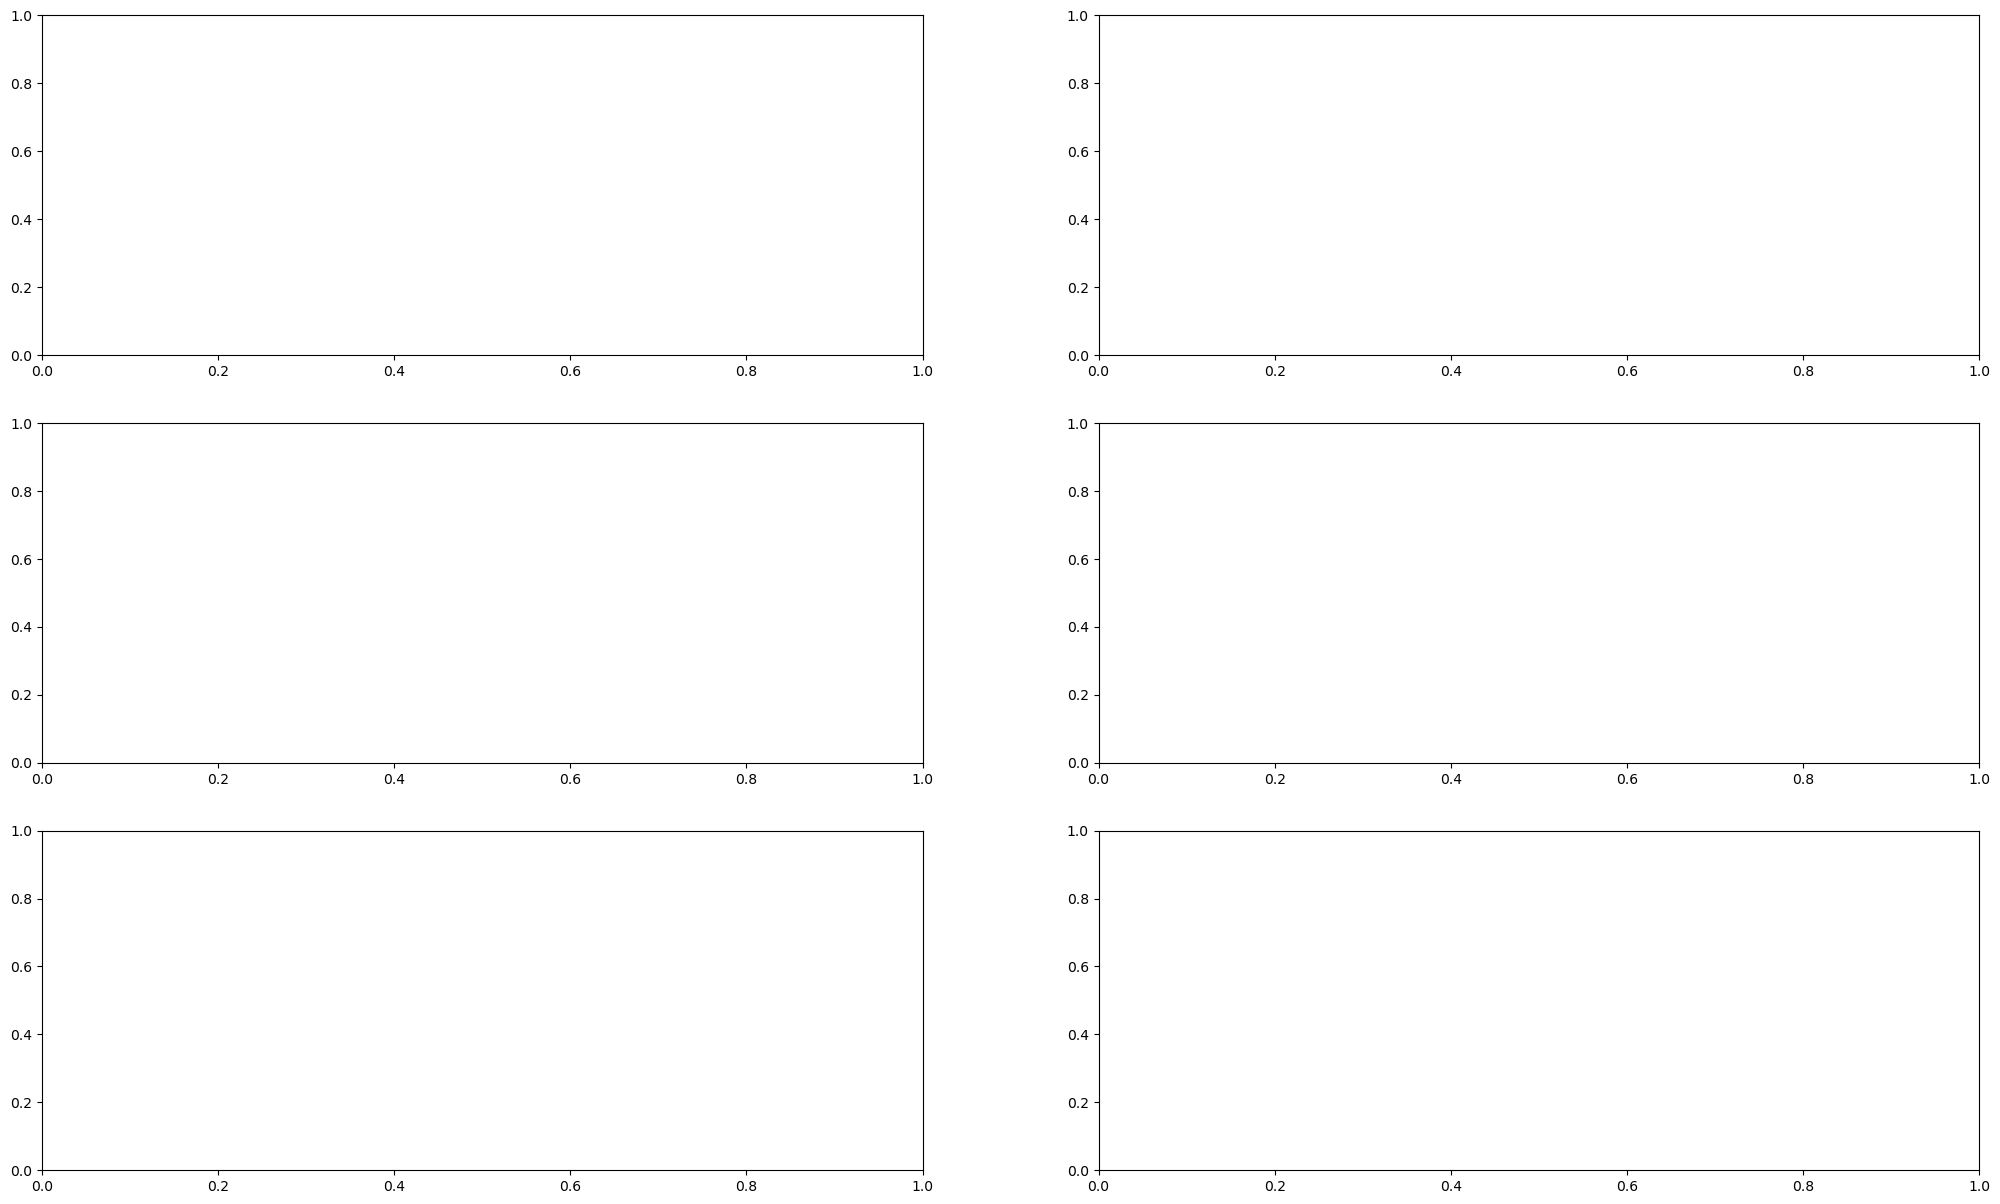

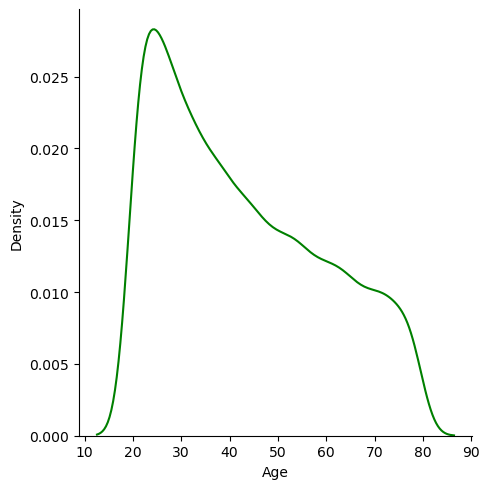

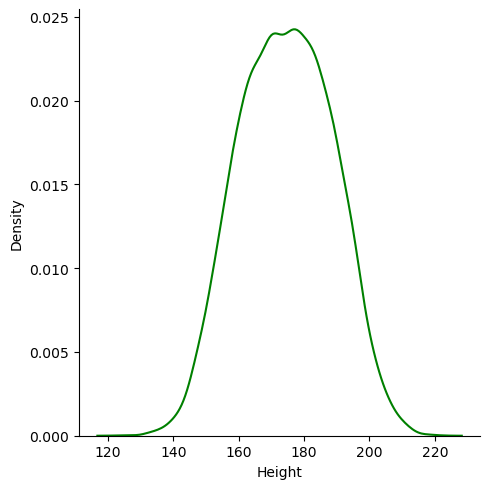

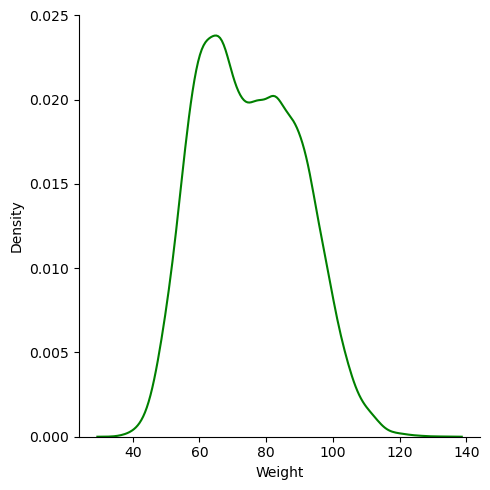

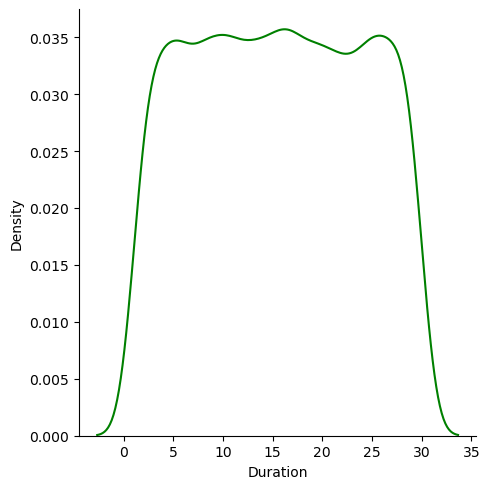

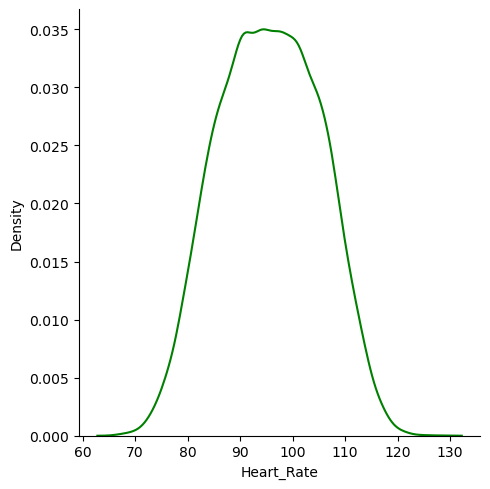

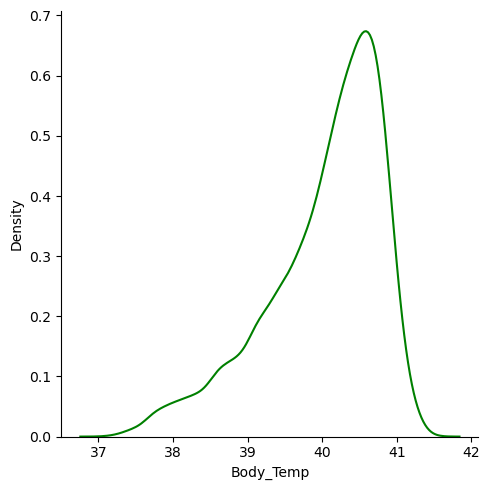

In [40]:
important = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp']


fig , ax = plt.subplots(3 , 2 , figsize=(25,15))
for i,subplot in zip(important,ax.flatten()):
    sns.displot(df[i],ax=subplot,color = 'g',kind='kde')

Age


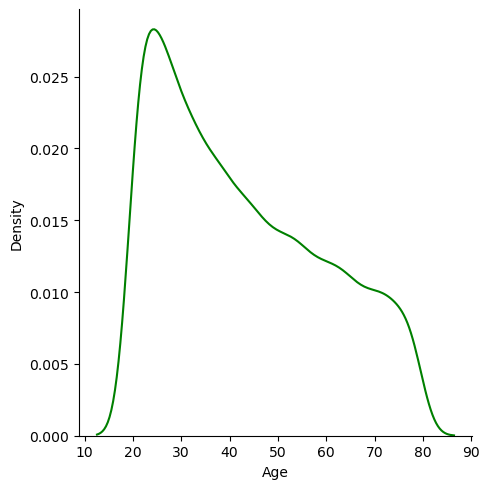

Height


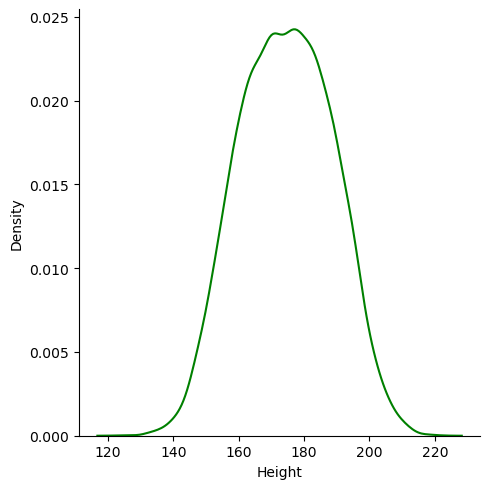

Weight


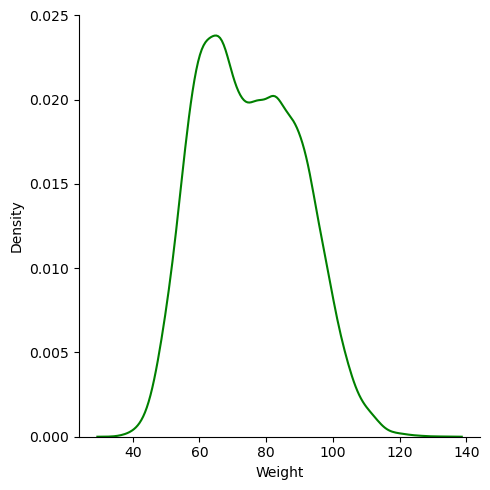

Duration


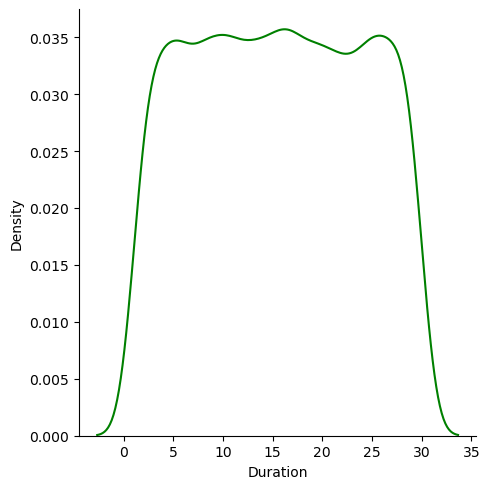

Heart_Rate


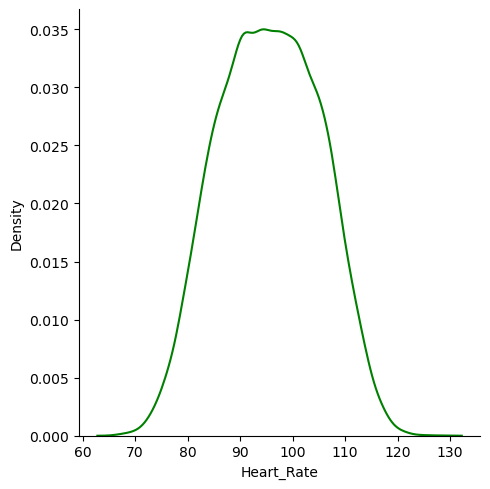

Body_Temp


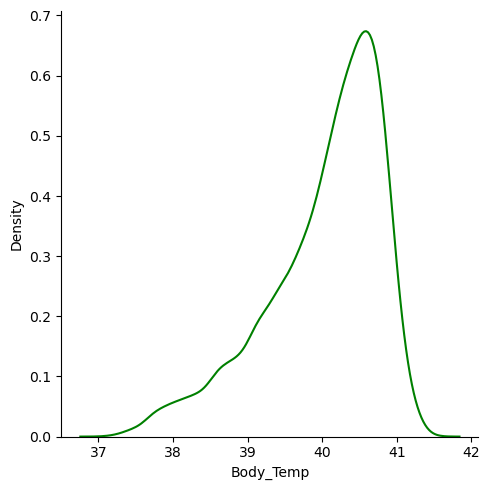

In [44]:
for i in df.columns:
    #print(i)
    if i == 'Gender' or i == 'Calories':
        pass
    else:
        print(i)
        sns.displot(df[i] , color = 'g',kind='kde')
    plt.show()
    

- Scaling 
- varaiable transformation 


- split the data 

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Model_Development 

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
reg = LinearRegression()

In [51]:
reg.fit(X_train,y_train)

LinearRegression()

In [52]:
reg.coef_

array([  1.37736727,   0.49954826,  -0.17984834,   0.29769877,
         6.61981819,   1.99372814, -16.94785453])

In [53]:
reg.intercept_

461.5708592857328

- Train-acc

In [54]:
y_train_pred = reg.predict(X_train)
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.9676004204744925

- Test-acc

In [56]:
y_test_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.9663701348612176

- Saving Model 

In [57]:
import pickle 

In [58]:
with open('./calories.pkl' , 'wb') as f:
    pickle.dump(reg , f)

### Now pickle file is your model 